<a href="https://colab.research.google.com/github/Shaheer-khan-github/Geo-Spatial-Data-Analysis/blob/main/Geo_Spatial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Geo pandas
!pip install geopandas

     |████████████████████████████████| 1.0MB 5.2MB/s 
     |████████████████████████████████| 6.5MB 16.3MB/s 
     |████████████████████████████████| 15.3MB 195kB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


In [2]:
# Import geo pandas
# GeoPandas is an open source project to make working with geospatial data in python easier.
import geopandas as gpd

In [3]:
!git clone https://github.com/Shaheer-khan-github/Geo-Spatial-Data-Analysis.git

Cloning into 'Geo-Spatial-Data-Analysis'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 44 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [5]:
%cd /content/Geo-Spatial-Data-Analysis/Geo_Data/

/content/Geo-Spatial-Data-Analysis/Geo_Data


In [7]:
# Read in the data
# Shapefile shape format (.shp) contains the geometry data.
full_data = gpd.read_file("DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head(3)

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."


In [ ]:
# Type of Data
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [8]:
# Made a copy of dataframe based on all rows and "CLASS, COUNTY and Geometry columns 
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [10]:
# Information about data
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CLASS     1219 non-null   object  
 1   COUNTY    2983 non-null   object  
 2   geometry  2983 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 70.0+ KB


In [11]:
# Different land types and the times they occur
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

### **Wilderness Area:**

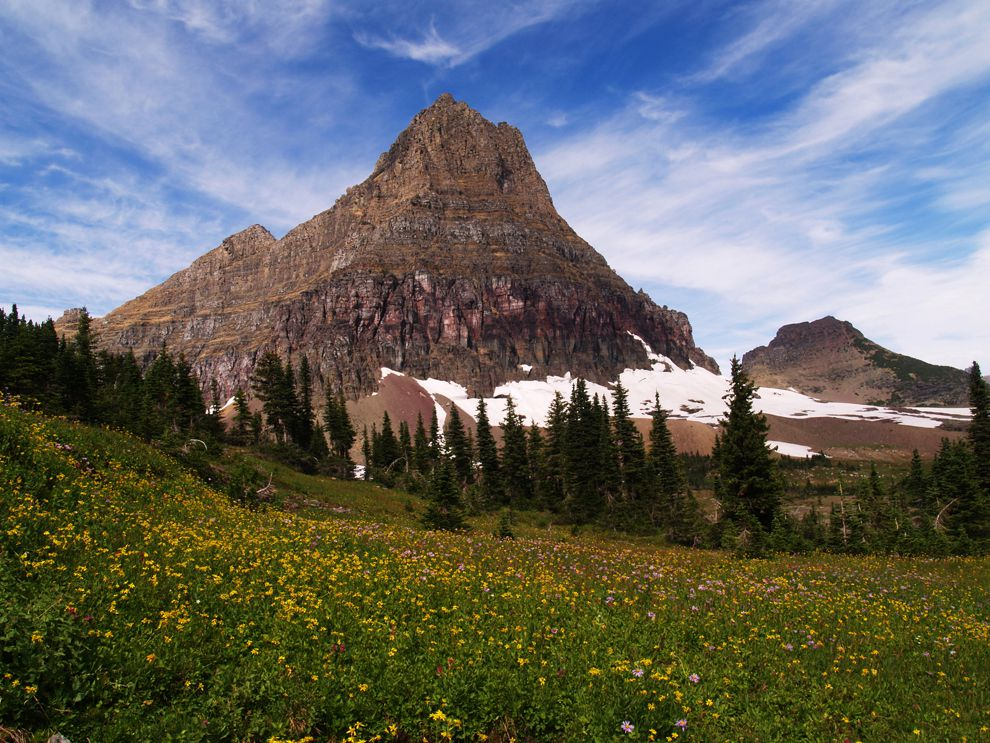

In [12]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin([ 'WILD FOREST' , 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the plot() method.

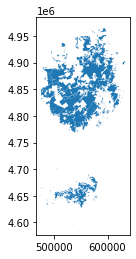

In [13]:
# Wild lands plotting
wild_lands.plot()

In [14]:
# First 5 rows of geometry column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

Geometry column can contain a variety of different datatypes, each entry will typically be a Point, LineString, or Polygon.

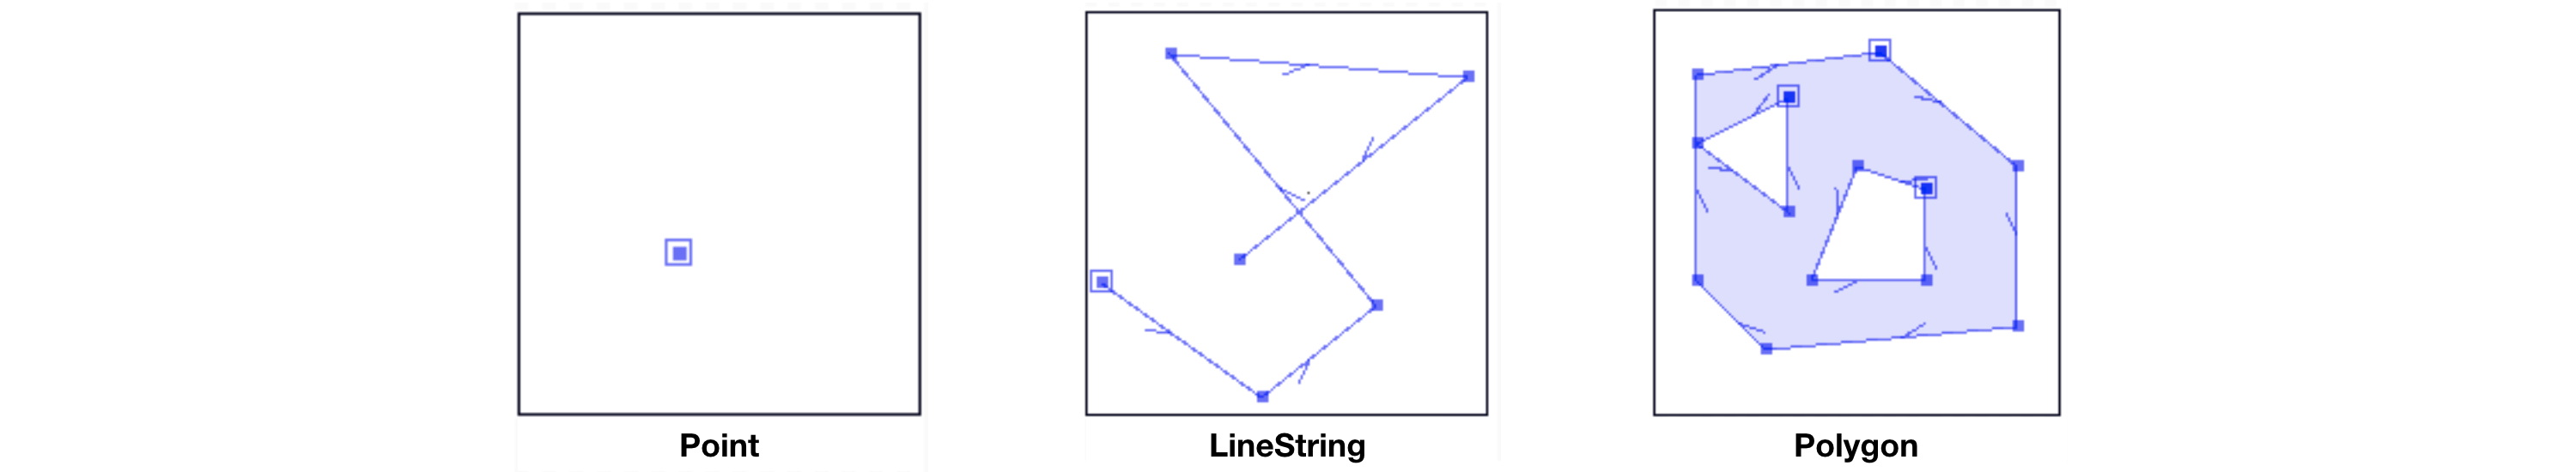

In the code cell below, we create three more GeoDataFrames, containing campsite locations (Point), foot trails (LineString), and county boundaries (Polygon).

[Camp site](https://www.google.com/search?q=camp+site&tbm=isch&ved=2ahUKEwia14TPoYzvAhVF0YUKHf_zCjAQ2-cCegQIABAA&oq=camp+site&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BAgjECc6BQgAELEDOggIABCxAxCDAToECAAQQzoHCAAQsQMQQ1DSwxNYr88TYLXWE2gAcAB4AIABjAKIAZgRkgEDMi05mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=2mE7YJqCIsWilwT_56uAAw&bih=667&biw=1366&safe=active&hl=en#imgrc=a5efAv8dR6RNLM)

[Foot trails](https://www.google.com/search?q=foot+trails+&tbm=isch&ved=2ahUKEwi6hOmP4YzvAhUGZxoKHYyGBZMQ2-cCegQIABAA&oq=foot+trails+&gs_lcp=CgNpbWcQAzIECCMQJzICCAAyBAgAEB4yBAgAEBgyBAgAEBgyBAgAEBhQ-zxY-zxgpD9oAHAAeACAAdkBiAHZAZIBAzItMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=caQ7YPqHNIbOaYyNlpgJ&bih=667&biw=1366&safe=active&hl=en#imgrc=Uyvc0Pkz7KKbaM)

[County Boundaries](https://www.google.com/search?q=county+boundaries&tbm=isch&ved=2ahUKEwiEhOaU4YzvAhUONRoKHVwOBYoQ2-cCegQIABAA&oq=county+boundaries&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BAgjECc6BQgAELEDOggIABCxAxCDAToECAAQQ1CfiwJYnKUCYKyqAmgAcAB4AIABzwSIAd8jkgEKMi0xNC4xLjEuMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=fKQ7YITWEY7qaNyclNAI&bih=667&biw=1366&safe=active&hl=en#imgrc=kDekdNDLMO_VZM)

In [15]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("NY_county_boundaries/NY_county_boundaries.shp")

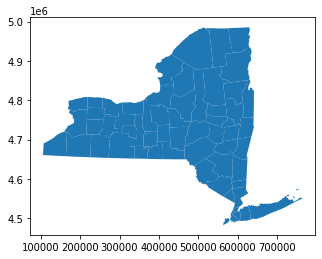

In [18]:
counties.plot()

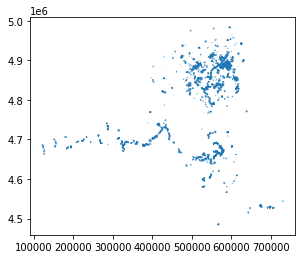

In [20]:
# campsites.plot()
# trails.plot()
# counties.plot()

Next, we create a map from all four GeoDataFrames.

The plot() method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

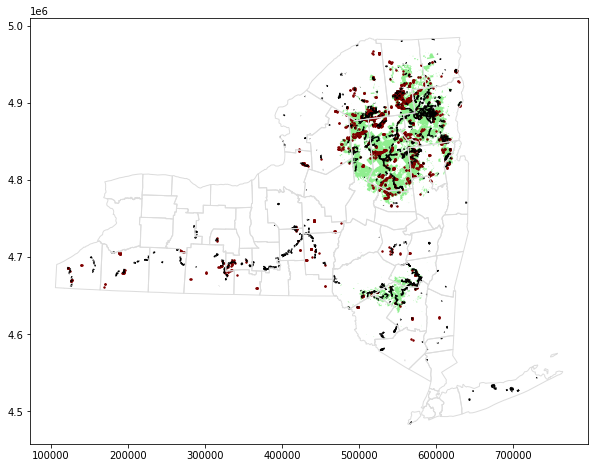

In [ ]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro',zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)